#  DBSCAN

## Conceito

Um algoritmo não supervisionado que separa clusters por densidade de agrupamento em um ponto no mesmo espaço. Ele pega um ponto (dado) baseado em um raio dado 'r' e escaneia todos os pontos ao redor desse dado.  
Após observado os elementos, caso ele encontre um número de elementos dado ‘x’ no perímetro da sua varredura, ele ‘marca’ o dado base como um cluster e vai para o dado mais próximo repetir o mesmo processo. Caso ele não encontre mais nenhum registro com o raio determinado, pega aleatoriamente um outro dado ainda não categorizado e repete o processo.
<img src="Imagens/DBSCAN/DBSCAN.png" width="600"/>

## Vantagem
    - Não necessita especificar o número de cluster (como o KMN)
    - É muito bom em separar clusters de alta densidade vs clusters de baixa densidade
    - Lida com ruído.


## Desvantagem
    - Dependendo da ordem de inicialização, dados originalmente de um grupo ficarão em um grupo diferente.
    - Tem dificuldades em separar clusters de mesma densidade.

## Classes de Problemas com melhores resultados:
Assim como o KMeans, DBSCAN é uma outra forma de analisar seus dados, funciona melhor com datasets com poucas dimensões.

## Exemplo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Primeiro Passo: Obter os dados

In [3]:
main = pd.read_csv('diabetes.csv')

In [4]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Segundo Passo: Standalizar os parâmetros

In [4]:
from sklearn.preprocessing import StandardScaler #Importa standardScaler da biblitoteca sklearn
scaler = StandardScaler()                        #Cria um objeto Standard Scaler
scaler.fit(main.drop('Outcome', axis=1))         #Treina o modelo sem o Target
scaled_features = scaler.transform(main.drop('Outcome', axis=1))      #Transforma os parâmetros em uma versão padronizada
main_feat = pd.DataFrame(scaled_features, columns=main.columns[:-1])  #Converte os parâmetros padronizados em um DataFrame
main_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Terceiro Passo: Encontrar parâmetros para o DBSCAN

Link utilizado de estudo:https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

Para min_sample usei a fórmula: min_samples=2*dimensão. Como dimensão = 8 (sem incluir target) min_samples=16

Para epsilon foi usado técnica que cálcula a média da distância entre os pontos e os seus KNN. O "k" médio será plotado em um gráfico e o valor epsilon será o maior ponto de curvatura desse gráfico. Onde o "k" do KNN será o min_samples

In [5]:
from sklearn.neighbors import NearestNeighbors

Text(0.5, 0, 'índices')

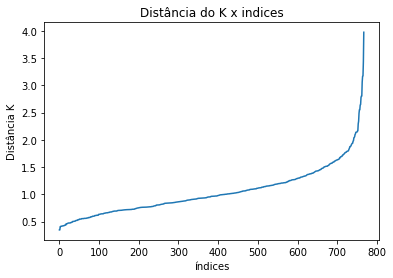

In [6]:
neighbors = NearestNeighbors(n_neighbors=16)
neighbors_fit = neighbors.fit(main_feat)
distances, indices = neighbors_fit.kneighbors(main_feat)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Distância do K x indices')
plt.ylabel('Distância K')
plt.xlabel('índices')

Pelo Gráfico o valor mais adequado seria em torno de epislon = 1.7

### Quarto passo: Implementar o DBSCAN

In [7]:
from sklearn.cluster import DBSCAN                  #Aqui importamos DBSCAN

In [41]:
model = DBSCAN(eps=1.7,min_samples=16)              #Para o min_sample usei a fórmula: min_samples=2*dimensão

In [42]:
model.fit(main_feat)

DBSCAN(eps=1.7, min_samples=16)

In [43]:
model.labels_

array([ 0,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
       -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,
       -1, -1, -1,  0,  0

### Quinto Passo: Analisar os dados

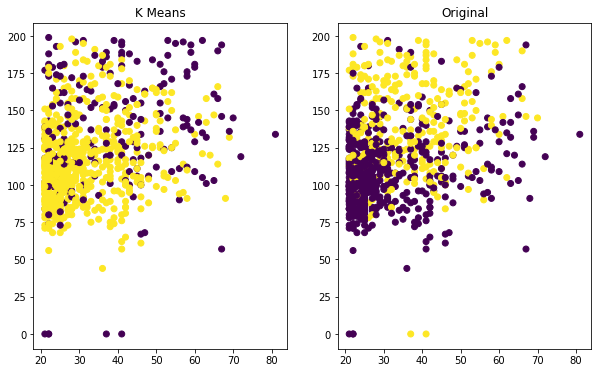

In [11]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(main['Age'],main['Glucose'],c=model.labels_)
ax2.set_title("Original")
ax2.scatter(main['Age'],main['Glucose'],c=main['Outcome'])

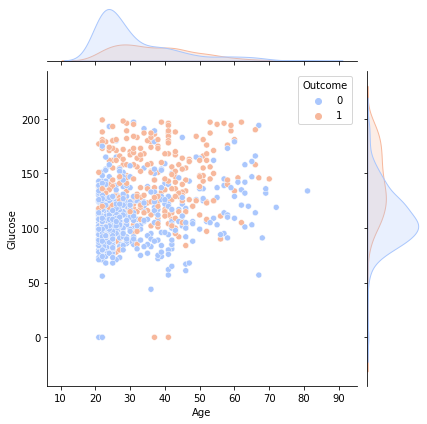

In [19]:
sns.jointplot(x='Age',y='Glucose',data=main,kind='scatter', hue='Outcome',palette='coolwarm')

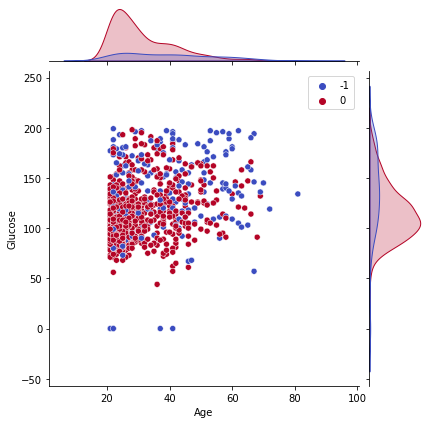

In [20]:
sns.jointplot(x='Age',y='Glucose',data=main,kind='scatter', hue=model.labels_,palette='coolwarm')

In [ ]:
sns.jointplot(x='Age',y='Glucose',data=main,kind='scatter', hue='Outcome',palette='coolwarm')

In [31]:
def positivo(x):                      #Função para retornar 1 para todos os valores que estão -1 na coluna do DBSCAN
    if x == -1:
        return 1
    else:
        return 0
    
main['DBSCAN'] = model.labels_
main.head()
main['DBSCAN'] = main['DBSCAN'].apply(lambda x: positivo(x))
main.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,DBSCAN
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.153002
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.287638
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,-0.149487
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.057776
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.228127
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.107503
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.361434
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.310941
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.275717
DBSCAN,0.153002,0.287638,-0.149487,0.057776,0.228127,0.107503,0.361434,0.310941,0.275717,1.000000


Assim como os outros métodos, DBSCAN não está com uma boa correlação com o Outcome